# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

**After this lesson, students will be able  to**:
- build a neural network using the Python library `keras`

In [1]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [8]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [10]:
keras.__version__, tf.__version__

('2.3.1', '2.0.0')

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [13]:
X_train_scaled.shape

(426, 30)

## Constructing a Neural Network in Keras

In [15]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense

# Importing our optimizer
from keras.optimizers import Adam


In [17]:
model = Sequential()

# want one input for each one of my predictors(features)
inputs = X_train.shape[1]
hiddens = inputs
                                        # tanh: hyperbolic tangent function (squashes values to between 0 and 1)
model.add(Dense(hiddens, input_dim=inputs, activation='tanh'))
model.add(Dense(1))

In [18]:
adam = Adam()
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['acc'])

In [19]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
         epochs=20)

Train on 426 samples, validate on 143 samples
Epoch 1/20
426/426 [==============================] - 1s 1ms/step - loss: 0.8477 - acc: 0.3545 - val_loss: 0.2253 - val_acc: 0.6084
Epoch 2/20
426/426 [==============================] - 0s 64us/step - loss: 0.2197 - acc: 0.6127 - val_loss: 0.1216 - val_acc: 0.7203
Epoch 3/20
426/426 [==============================] - 0s 69us/step - loss: 0.1277 - acc: 0.8427 - val_loss: 0.1184 - val_acc: 0.8811
Epoch 4/20
426/426 [==============================] - 0s 68us/step - loss: 0.1146 - acc: 0.8920 - val_loss: 0.0886 - val_acc: 0.9091
Epoch 5/20
426/426 [==============================] - 0s 70us/step - loss: 0.1054 - acc: 0.8967 - val_loss: 0.0805 - val_acc: 0.9161
Epoch 6/20
426/426 [==============================] - 0s 67us/step - loss: 0.0984 - acc: 0.9014 - val_loss: 0.0757 - val_acc: 0.9231
Epoch 7/20
426/426 [==============================] - 0s 66us/step - loss: 0.0913 - acc: 0.8991 - val_loss: 0.0733 - val_acc: 0.9231
Epoch 8/20
426/426 [====

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, verbose=0, batch_size=200)

What is the difference between "validation data" and "test data"? Strictly speaking (though not all DS practitioners speak strictly), validation data is used to choose models' hyperparameters while test data is used to evaluate a fully-developed model. For more, see [here](https://machinelearningmastery.com/difference-test-validation-datasets/).

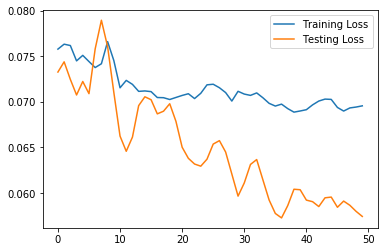

In [21]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend();

In [22]:
# look at model's predictions next to true values
np.hstack([model.predict(X_test), y_test.reshape(143, 1)])[:20]

array([[0.96146452, 1.        ],
       [0.5754028 , 0.        ],
       [0.96980017, 1.        ],
       [0.03301861, 0.        ],
       [0.89441639, 1.        ],
       [0.95666814, 1.        ],
       [0.95691752, 1.        ],
       [0.65858674, 1.        ],
       [0.99032062, 1.        ],
       [0.9569937 , 1.        ],
       [0.37732127, 1.        ],
       [0.95632255, 1.        ],
       [0.03301861, 0.        ],
       [0.95721424, 1.        ],
       [0.21480741, 1.        ],
       [0.95665181, 1.        ],
       [0.86885238, 1.        ],
       [0.95671284, 1.        ],
       [0.96020865, 1.        ],
       [0.95671391, 1.        ]])

In [24]:
# output: [loss, accuracy]
model.evaluate(X_test, y_test)

143/143 [==============================] - 0s 40us/step


[0.05744233796490239, 0.9160839319229126]

## Tensorflow

### Tensorflow as a dynamic programming tool

In [25]:
# Note: This code relies on Tensorflow 1.x.x syntax.

tf.compat.v1.disable_eager_execution()

slot_1 = tf.compat.v1.placeholder(tf.int64, shape=(3, 2))

slot_2 = tf.compat.v1.placeholder(tf.int64, shape=(2, 3))

ans = tf.matmul(slot_1, slot_2)

In [26]:
with tf.compat.v1.Session() as sess:
    result = sess.run(ans, feed_dict={slot_1:[[3, 3],[2, 2],[1, 1]], slot_2:[[1, 2, 3], [1, 1, 1]]})

In [27]:
print(result)

[[ 6  9 12]
 [ 4  6  8]
 [ 2  3  4]]


### Neural Network

In [28]:
tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.compat.v1.layers.dense(X, 30, activation=tf.nn.tanh)
y_hat = tf.compat.v1.layers.dense(hid, 1, activation=tf.nn.tanh)

loss = tf.compat.v1.losses.log_loss(y, y_hat)
optimizer = tf.compat.v1.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.compat.v1.train.Saver()

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [29]:
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_scaled, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test})

classes = (pred > 0.5).astype(int)

print(metrics.mean_squared_error(y_test, classes))
print(metrics.accuracy_score(y_test, classes))

0.6713286713286714
0.32867132867132864
